In [1]:
'''
Christina Paolicelli
3/1/20

This file pulls in an already trained Model (saved as h5py) and runs a test
dataset aganist it.

The test datset is comprised on one image of each of the characters the
model is trained to classify
'''
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt

TEST_PATH = "../TestSet"
CLASS_NAMES = ['0','1','2','3','4','5','6','7','8','9','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'R', 'S', 'T', 'V', 'W', 'X', 'Y', 'Z']


In [2]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(4,4))
  for n in range(16):
      ax = plt.subplot(4,4,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[int(label_batch[n])])
      plt.axis('off')
  plt.tight_layout()
  plt.show()
  plt.figure(figsize=(4,4))
  for n in range(16,32):
      ax = plt.subplot(4,4,n-15)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[int(label_batch[n])])
      plt.axis('off')
  plt.tight_layout()
  plt.show()

In [3]:
def loadTestDataset():
    batch_size = 128
    IMG_WIDTH = 416
    IMG_HEIGHT = 416
    test_image_generator = ImageDataGenerator(rescale=1./255)
    test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=TEST_PATH,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')
    testImages, testLabels = next(test_data_gen)
    return testImages, testLabels

In [4]:
def loadTestDataset():
    batch_size = 128
    IMG_WIDTH = 416
    IMG_HEIGHT = 416
    test_image_generator = ImageDataGenerator(rescale=1./255)
    test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=TEST_PATH,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')
    testImages, testLabels = next(test_data_gen)
    return testImages, testLabels

In [5]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(CLASS_NAMES[predicted_label],
                                100*np.max(predictions_array),
                                CLASS_NAMES[int(true_label)]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(32))
  plt.yticks([])
  thisplot = plt.bar(range(32), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  print(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[int(true_label)].set_color('blue')



In [6]:
def makePredictions(model, testImages, testLabels):
    # Make Predictions
    probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
    predictions = probability_model.predict(testImages)

    # Plot the first X test images, their predicted labels, and the true labels.
    # Color correct predictions in blue and incorrect predictions in red.
    for i in range(32):
        plt.figure(figsize=(6,3))
        plt.subplot(1,2,1)
        plot_image(i, predictions[i], testLabels, testImages)
        plt.subplot(1,2,2)
        plot_value_array(i, predictions[i],  testLabels)
        plt.show()

    return predictions
    

In [7]:
def main():
    # Load Test Dataset & Show 25 of them with the labels (just for fun)
    testImages, testLables = loadTestDataset()
    show_batch(testImages, testLables)
    
    # Load Pre-trained Model
    # https://www.tensorflow.org/tutorials/keras/save_and_load
    model = tf.keras.models.load_model('my_model.h5')

    # show the architecture (because why not)
    model.summary()
    
    test_loss, test_acc = model.evaluate(testImages, testLables, verbose=2)
    print('\n Test accuracy:', test_acc)
    
    predictions = makePredictions(model, testImages, testLables)

Found 32 images belonging to 32 classes.


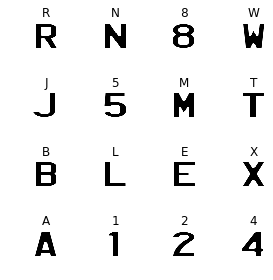

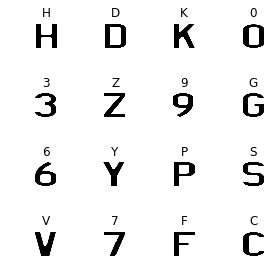

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 416, 416, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 208, 208, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 208, 208, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 104, 104, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 104, 104, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 52, 52, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 173056)            0

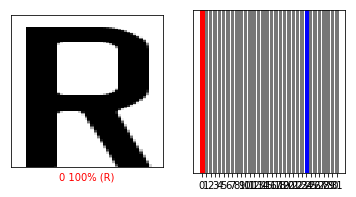

[1.]


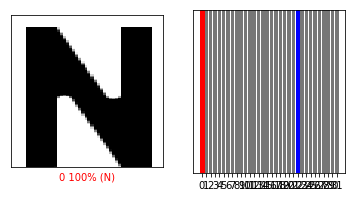

[1.]


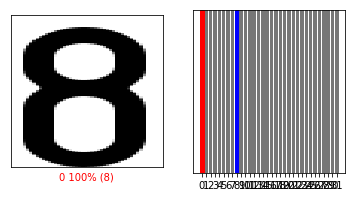

[1.]


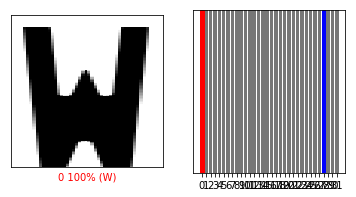

[1.]


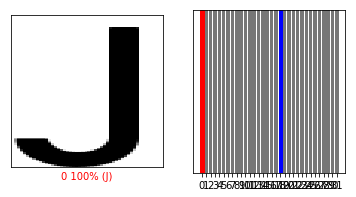

[1.]


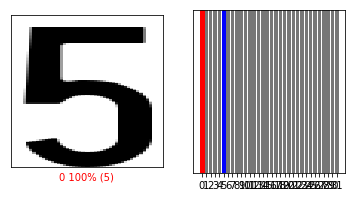

[1.]


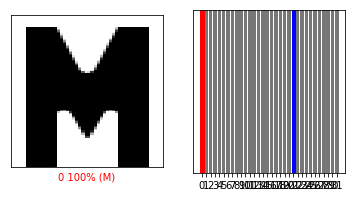

[1.]


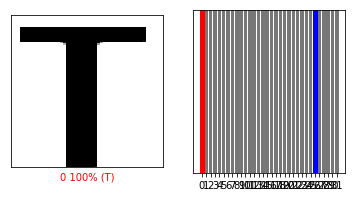

[1.]


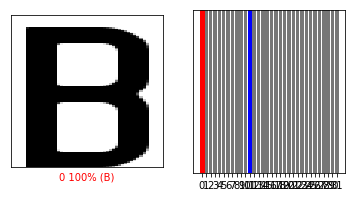

[1.]


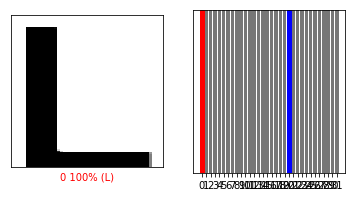

[1.]


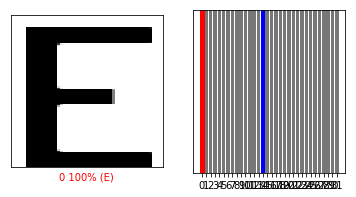

[1.]


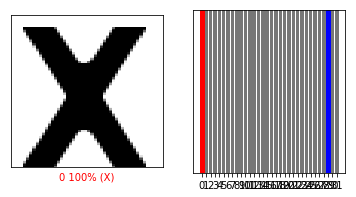

[1.]


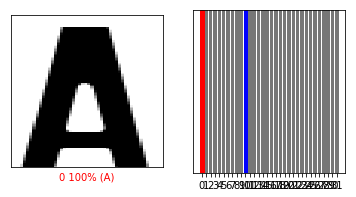

[1.]


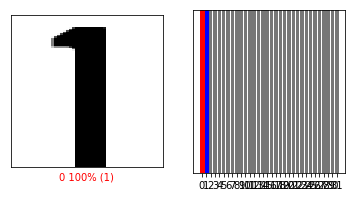

[1.]


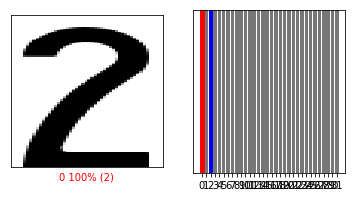

[1.]


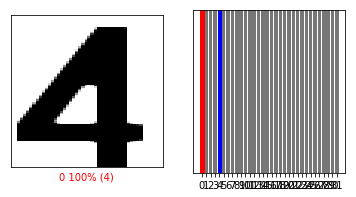

[1.]


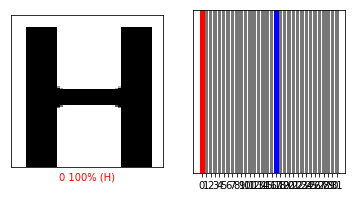

[1.]


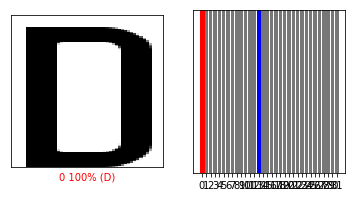

[1.]


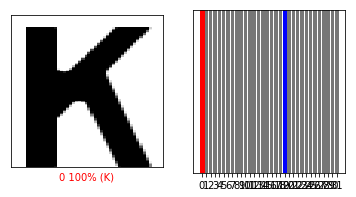

[1.]


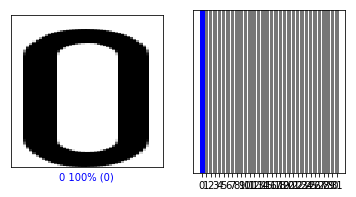

[1.]


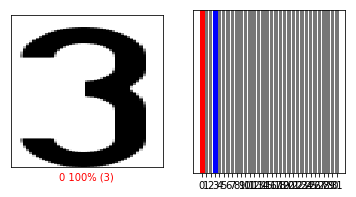

[1.]


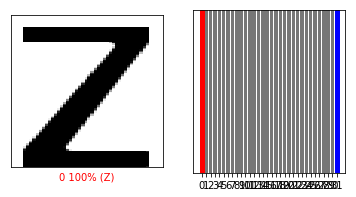

[1.]


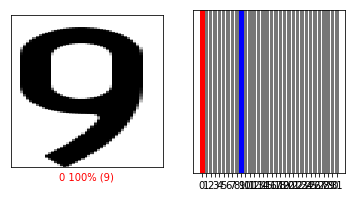

[1.]


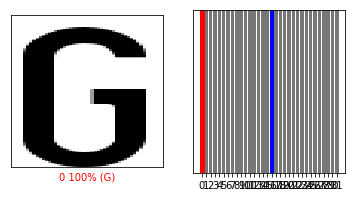

[1.]


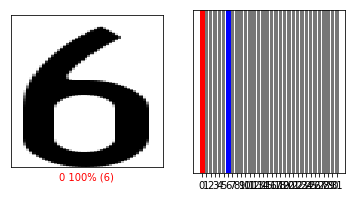

[1.]


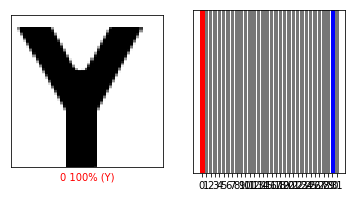

[1.]


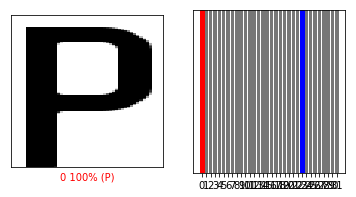

[1.]


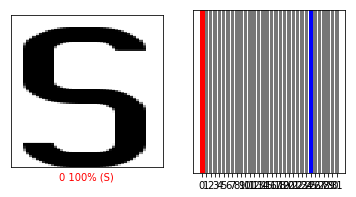

[1.]


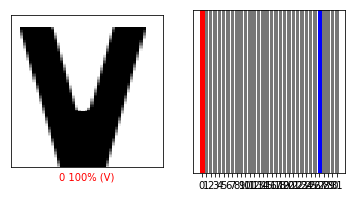

[1.]


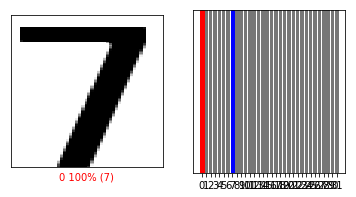

[1.]


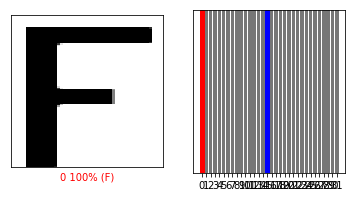

[1.]


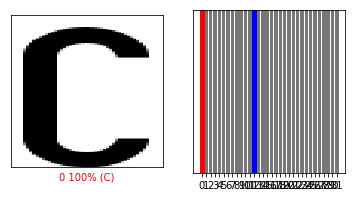

In [8]:
if __name__ == '__main__':
    main()